In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib


In [3]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 
from phasor import mechanical

b'2017-07-17 18:09:27 -0400 (79be66c74d34d7c2a60e055a1a3da8b0fe6559a9)'


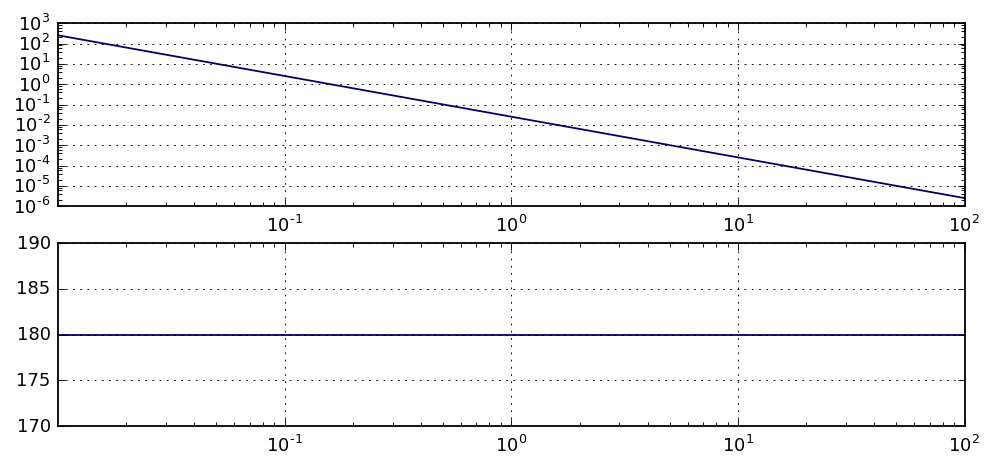

In [4]:
sys = system.system.BGSystem(
    F_AC = logspaced(0.01, 100, 100),
)
sys.own.F1 = mechanical.ForceSource()
#sys.own.R1 = mechanical.ForceReadout(
#    terminal = sys.F1.pm_A,
#)
sys.own.R1 = mechanical.DisplacementReadout(
    terminal = sys.F1.pm_A,
)
sys.own.M1 = mechanical.Mass(mass_kg = 1)
sys.M1.pm_A.bond(sys.F1.pm_A)
sys.own.RAC1 = readouts.ACReadout(
    portD = sys.F1.F.i,
    portN = sys.R1.d.o,
)

readoutI =  sys.RAC1

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

#readoutI.AC_sensitivity

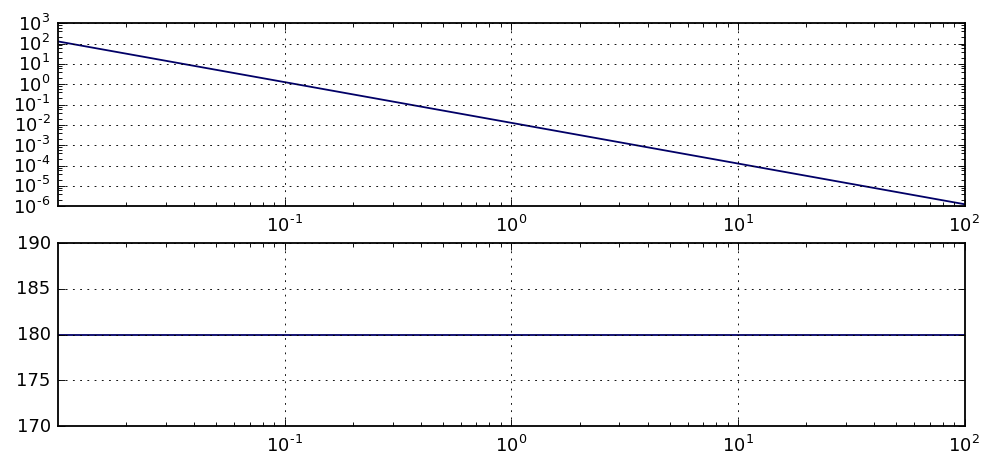

In [5]:
sys = system.system.BGSystem(
    F_AC = logspaced(0.01, 100, 100),
)
sys.own.F1 = mechanical.ForceSource()
#sys.own.R1 = mechanical.ForceReadout(
#    terminal = sys.F1.pm_A,
#)
sys.own.R1 = mechanical.DisplacementReadout(
    terminal = sys.F1.pm_A,
)
sys.own.M1 = mechanical.Mass(mass_kg = 1)
sys.own.M2 = mechanical.Mass(mass_kg = 1)
sys.M1.pm_A.bond(sys.F1.pm_A)
sys.M1.pm_A.bond(sys.M2.pm_A)
sys.own.RAC1 = readouts.ACReadout(
    portD = sys.F1.F.i,
    portN = sys.R1.d.o,
)

readoutI =  sys.RAC1

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

#readoutI.AC_sensitivity

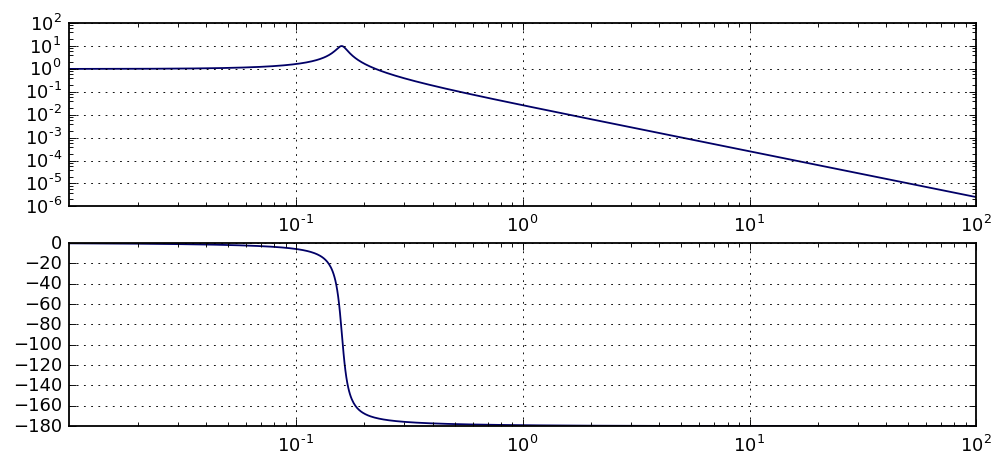

In [6]:
sys = system.system.BGSystem(
    F_AC = logspaced(0.01, 100, 1000),
)
sys.own.F1 = mechanical.ForceSource()
sys.own.R1 = mechanical.DisplacementReadout(
    terminal = sys.F1.pm_A,
)
sys.own.M1 = mechanical.Mass(mass_kg = 1)
sys.own.S1 = mechanical.TerminatorSpring(elasticity_N_m = 1)
sys.own.D1 = mechanical.TerminatorDamper(resistance_Ns_m = .1)
sys.M1.pm_A.bond(sys.F1.pm_A)
sys.S1.pm_A.bond(sys.F1.pm_A)
sys.D1.pm_A.bond(sys.F1.pm_A)
sys.own.RAC1 = readouts.ACReadout(
    portD = sys.F1.F.i,
    portN = sys.R1.d.o,
)

readoutI =  sys.RAC1

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

#readoutI.AC_sensitivity

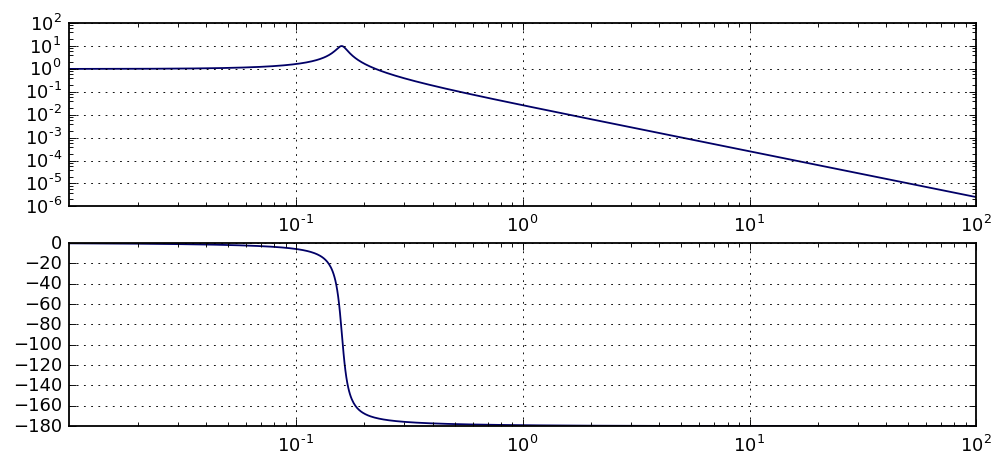

In [7]:
sys = system.system.BGSystem(
    F_AC = logspaced(0.01, 100, 1000),
)
sys.own.F1 = mechanical.ForceSource()
sys.own.R1 = mechanical.DisplacementReadout(
    terminal = sys.F1.pm_A,
)
sys.own.M1 = mechanical.Mass(mass_kg = 1)
sys.own.S1 = mechanical.TerminatorSpring(elasticity_N_m = 1)
sys.own.D1 = mechanical.TerminatorDamper(resistance_Ns_m = .1)
sys.M1.pm_A.bond(sys.F1.pm_A)
sys.S1.pm_A.bond(sys.F1.pm_A)
sys.D1.pm_A.bond(sys.F1.pm_A)
sys.own.RAC1 = readouts.ACReadout(
    portD = sys.F1.F.i,
    portN = sys.R1.d.o,
)

readoutI =  sys.RAC1

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

#readoutI.AC_sensitivity

100029919.14 100000370.436


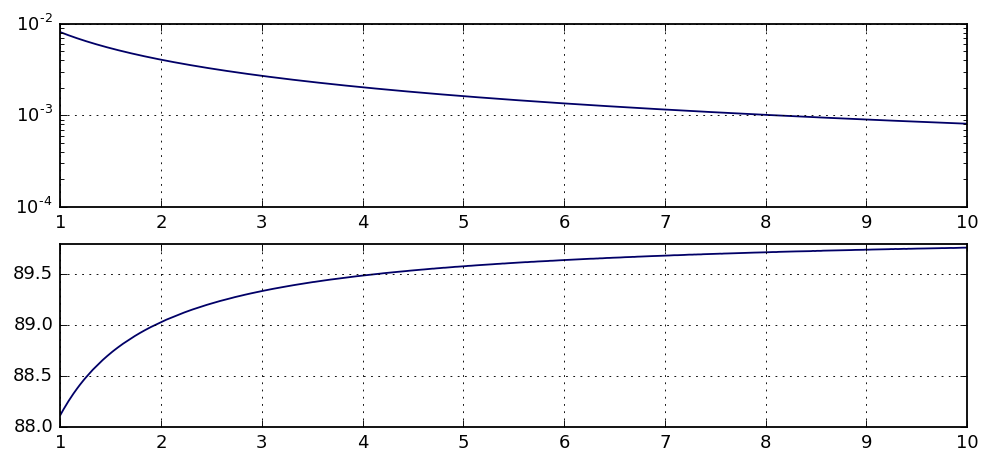

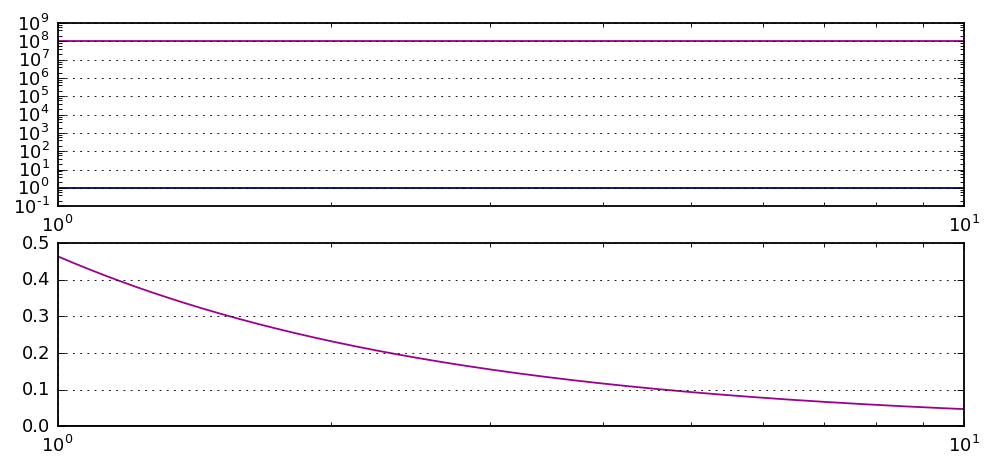

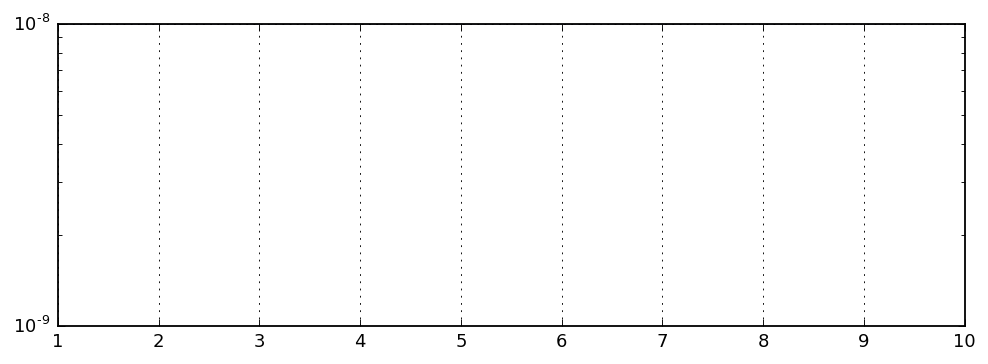

In [8]:
sys = system.system.BGSystem(
    #F_AC = logspaced(100, 2000, 10000),
    #F_AC = np.linspace(499.999, 500.001, 100000),
    F_AC = 500, #np.linspace(499.999, 500.001, 100000),
)
#sys.own.R1 = mechanical.DisplacementReadout(
#    terminal = sys.F1.pm_A,
#)
#sys.own.M1 = mechanical.Mass(mass_kg = 1)
sys.own.M1 = mechanical.DisplacementSource()
sys.own.M2 = mechanical.Mass(mass_kg = 40.01)
sys.own.R1 = mechanical.DisplacementReadout(
    terminal = sys.M2.pm_A,
)
sys.own.S1 = mechanical.String(
    tension_N = 400,
    mass_density_kg_m = .0004,
    length_m = 1,
    Loss = 1e-8,
)
ratio_heavy = 1e2
m = np.logspace(.000001, 1, 1000)
sys.own.S2 = mechanical.SeriesSpring(
    elasticity_N_m = (2 * np.pi * 500)**2 * m,
    loss_angle_by_freq = 1e-3,
)
sys.M1.pm_A.bond(
    sys.S1.pm_A,
)
sys.M2.pm_A.bond(
    sys.S1.pm_B
)
sys.M2.pm_A.bond(
    sys.S2.pm_B
)
sys.own.M3 = mechanical.Mass(mass_kg = m)
sys.M3.pm_A.bond(
    sys.S2.pm_A
)


sys.own.RAC1= readouts.ACReadoutLG(
    #portAct = sys.S1.pm_A.o,
    #portSense= sys.S1.pm_A.i,
    portAct = sys.S1.cable.pm_A.o,
    portSense= sys.S1.cable.pm_A.i,
)

sys.own.RAC2= readouts.ACReadout(
    portN = sys.R1.d.o,
    portD = sys.M1.d.i,
)

readoutI =  sys.RAC2
X = m

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(X, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(X, np.angle(readoutI.AC_sensitivity, deg = True))
Fb.ax0.set_xscale('linear')
Fb.ax1.set_xscale('linear')

#readoutI.AC_sensitivity
readoutI =  sys.RAC1

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(X, abs(readoutI.OLG))
Fb.ax0.loglog(X, abs(readoutI.CLG))
Fb.ax1.semilogx(X, np.angle(-readoutI.OLG, deg = True))
Fb.ax1.semilogx(X, np.angle(readoutI.CLG, deg = True))
#Fb.ax0.set_xscale('linear')
#Fb.ax1.set_xscale('linear')

Fb = mplfigB(Nrows=1)
Fb.ax0.semilogy(X, 1 - abs(readoutI.OLG))
Fb.ax0.set_xscale('linear')
print(max(abs(readoutI.CLG)), min(abs(readoutI.CLG)))
#readoutI.AC_sensitivity

272276662636.0 6576251300.74


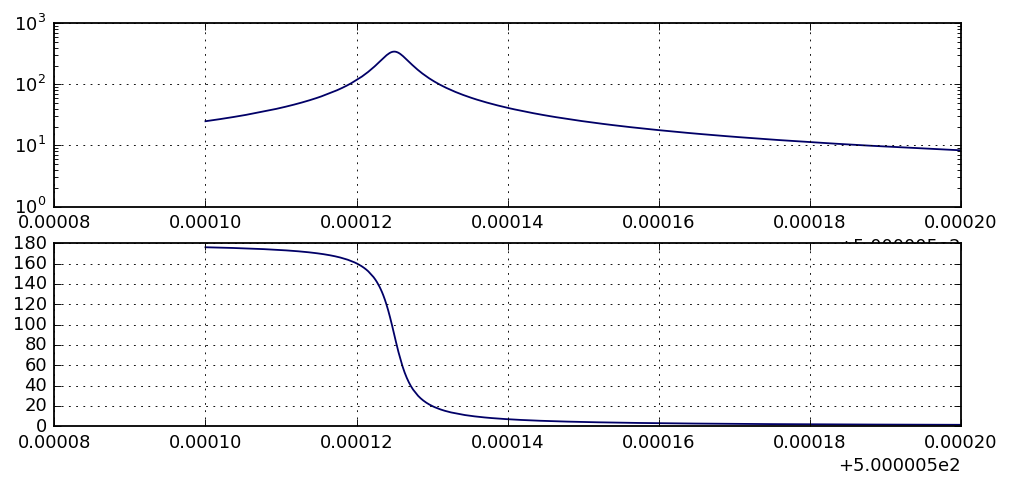

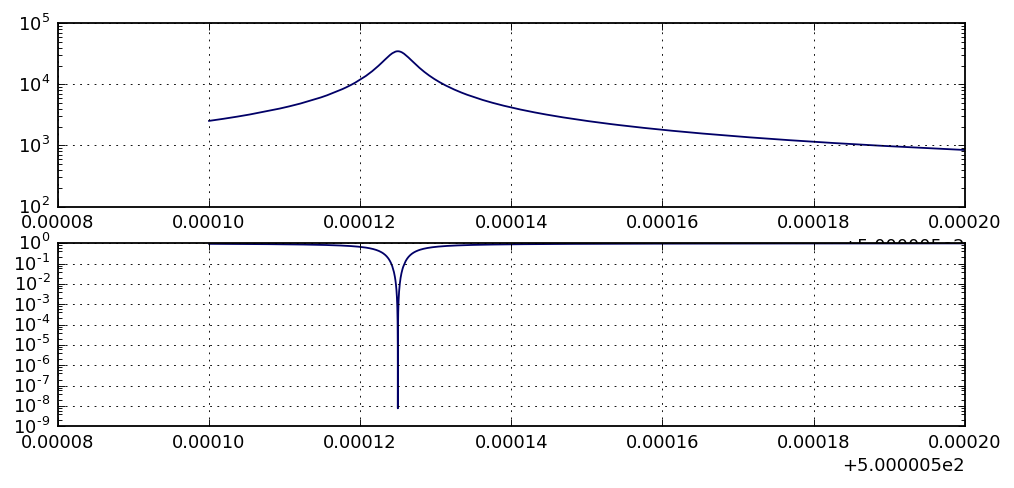

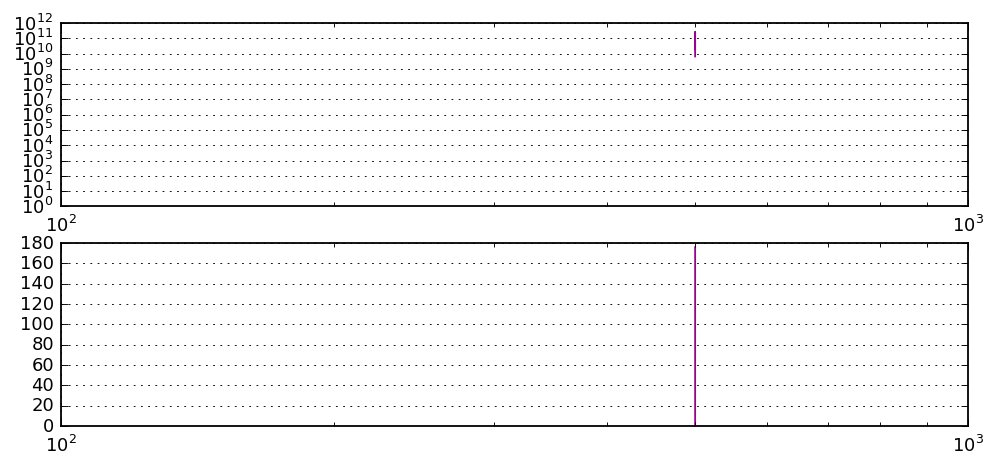

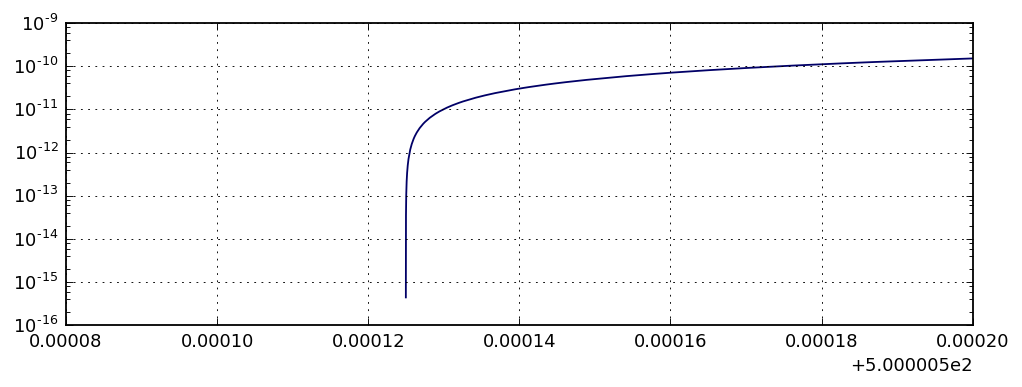

In [23]:
sys = system.system.BGSystem(
    #F_AC = logspaced(100, 2000, 10000),
    F_AC = np.linspace(500.0006, 500.0007, 100000),
    #F_AC = 500, #np.linspace(499.999, 500.001, 100000),
)
#sys.own.R1 = mechanical.DisplacementReadout(
#    terminal = sys.F1.pm_A,
#)
#sys.own.M1 = mechanical.Mass(mass_kg = 1)
sys.own.M1 = mechanical.DisplacementSource()
sys.own.M2 = mechanical.Mass(mass_kg = 40.00)
sys.own.R1 = mechanical.DisplacementReadout(
    terminal = sys.M2.pm_A,
)

m_string = .0004
sys.own.S11 = mechanical.SeriesSpring(
    elasticity_N_m = (2 * np.pi * 500)**2 * m_string / 2,
    loss_angle_by_freq = 1e-9,
)
sys.own.S12 = mechanical.SeriesSpring(
    elasticity_N_m = (2 * np.pi * 500)**2 * m_string / 2,
    loss_angle_by_freq = 1e-9,
)
sys.own.Mmid = mechanical.Mass(
    mass_kg = m_string,
)
m = .001 # np.logspace(.000001, 1, 1000)
sys.own.S2 = mechanical.SeriesSpring(
    elasticity_N_m = (2 * np.pi * 500)**2 * m,
    loss_angle_by_freq = 1e-2,
)
sys.M1.pm_A.bond(
    sys.S11.pm_A,
)
sys.S11.pm_B.bond(
    sys.Mmid.pm_A,
)
sys.S12.pm_A.bond(
    sys.Mmid.pm_A,
)
sys.M2.pm_A.bond(
    sys.S12.pm_B
)
sys.M2.pm_A.bond(
    sys.S2.pm_B
)
sys.own.M3 = mechanical.Mass(mass_kg = m)
sys.M3.pm_A.bond(
    sys.S2.pm_A
)


sys.own.RAC1= readouts.ACReadoutLG(
    #portAct = sys.S1.pm_A.o,
    #portSense= sys.S1.pm_A.i,
    portAct = sys.Mmid.pm_A.o,
    portSense= sys.Mmid.pm_A.i,
)

sys.own.RAC2= readouts.ACReadout(
    portN = sys.R1.d.o,
    portD = sys.M1.d.i,
)

sys.own.F2 = mechanical.ForceSource()
sys.F2.pm_A.bond(sys.Mmid.pm_A)
sys.own.D2 = mechanical.DisplacementReadout(
    terminal = sys.Mmid.pm_A,
)
sys.own.RIMP= readouts.ACReadout(
    portN = sys.D2.d.o,
    portD = sys.F2.F.i,
)


readoutI =  sys.RAC2
X = readoutI.F_Hz.val

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(X, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(X, np.angle(readoutI.AC_sensitivity, deg = True))
Fb.ax0.set_xscale('linear')
Fb.ax1.set_xscale('linear')

readoutI =  sys.RIMP
X = readoutI.F_Hz.val

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(X, abs(readoutI.AC_sensitivity))
Fb.ax1.loglog(X, 1 + readoutI.AC_sensitivity.imag/abs(readoutI.AC_sensitivity))
Fb.ax0.set_xscale('linear')
Fb.ax1.set_xscale('linear')

#readoutI.AC_sensitivity
readoutI =  sys.RAC1

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(X, abs(readoutI.OLG))
Fb.ax0.loglog(X, abs(readoutI.CLG))
Fb.ax1.semilogx(X, np.angle(-readoutI.OLG, deg = True))
Fb.ax1.semilogx(X, np.angle(readoutI.CLG, deg = True))
#Fb.ax0.set_xscale('linear')
#Fb.ax1.set_xscale('linear')

Fb = mplfigB(Nrows=1)
Fb.ax0.semilogy(X, 1 - abs(readoutI.OLG))
Fb.ax0.set_xscale('linear')
print(max(abs(readoutI.CLG)), min(abs(readoutI.CLG)))
#readoutI.AC_sensitivity